In [40]:
import pandas as pd

df_us = pd.read_csv('USvideos.csv')
df_in = pd.read_csv('INvideos.csv')
df_us['trending_date'] = pd.to_datetime(df_us['trending_date'], format='%y.%d.%m')


df_us.drop_duplicates(inplace=True)
df_all = pd.concat([df_us, df_in], keys=['US', 'IN'], names=['Region'])







In [64]:
import pandas as pd

df_us = pd.read_csv('USvideos.csv')
df_in = pd.read_csv('INvideos.csv')


df_us['trending_date'] = pd.to_datetime(df_us['trending_date'], format='%y.%d.%m')
df_in['trending_date'] = pd.to_datetime(df_in['trending_date'], format='%y.%d.%m')


df_us.drop_duplicates(inplace=True)
df_in.drop_duplicates(inplace=True)


df_us['region'] = 'US'
df_in['region'] = 'IN'

df_all = pd.concat([df_us, df_in], ignore_index=True)


df_all.drop_duplicates(subset=['video_id', 'title', 'region'], keep='first', inplace=True)


print(df_all.head())
print("Shape after duplicate removal:", df_all.shape)

df_all.to_csv('youtube_trending_cleaned.csv', index=False)



      video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [66]:

df_all.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [24]:
duplicates = df_all[df_all.duplicated(subset=['video_id', 'title'], keep=False)]
print(duplicates)



                 video_id        trending_date  \
Region                                           
US     0      2kyS6SvSYSE  2017-11-14 00:00:00   
       1      1ZAPwfrtAFY  2017-11-14 00:00:00   
       2      5qpjK5DgCt4  2017-11-14 00:00:00   
       3      puqaWrEC7tY  2017-11-14 00:00:00   
       4      d380meD0W0M  2017-11-14 00:00:00   
...                   ...                  ...   
IN     37347  iNHecA3PJCo             18.14.06   
       37348  dpPmPbhcslM             18.14.06   
       37349  mV6aztP58f8             18.14.06   
       37350  qxqDNP1bDEw             18.14.06   
       37351  wERgpPK44w0             18.14.06   

                                                          title  \
Region                                                            
US     0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
       1      The Trump Presidency: Last Week Tonight with J...   
       2      Racist Superman | Rudy Mancuso, King Bach & Le...   
       3      

In [17]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---

In [19]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df_all['title_sentiment'] = df_all['title'].apply(get_sentiment)
df_all['tags_sentiment'] = df_all['tags'].apply(get_sentiment)


In [26]:
print("Total duplicate rows:", df_all.duplicated().sum())


Total duplicate rows: 4263


In [28]:
duplicate_counts = df_all[df_all.duplicated(subset=['video_id', 'title'], keep=False)].groupby('Region').size()
print(duplicate_counts)


Region
IN    29865
US    40150
dtype: int64


In [23]:
import sqlite3
import pandas as pd


df = pd.read_csv('USvideos.csv')


conn = sqlite3.connect('youtube_trending.db')


df.to_sql('youtube_trending', conn, if_exists='replace', index=False)



40949

In [31]:
import sqlite3
import pandas as pd


df = pd.read_csv('USvideos.csv')


conn = sqlite3.connect('youtube_trending.db')
df.to_sql('youtube_trending', conn, if_exists='replace', index=False)

query = '''
SELECT category_id, AVG(views) AS avg_views
FROM youtube_trending
GROUP BY category_id
ORDER BY avg_views DESC;
'''

result = pd.read_sql_query(query, conn)
print(result)


    category_id     avg_views
0            10  6.201003e+06
1             1  3.106250e+06
2            29  2.963884e+06
3            20  2.620831e+06
4            24  2.067883e+06
5            17  2.025969e+06
6            22  1.531835e+06
7            23  1.480308e+06
8            28  1.452627e+06
9             2  1.355965e+06
10           26  9.837301e+05
11           43  9.035273e+05
12           19  8.546196e+05
13           15  8.311435e+05
14           27  7.129408e+05
15           25  5.925877e+05


In [33]:
trending_days = df_all.groupby('video_id')['trending_date'].nunique()


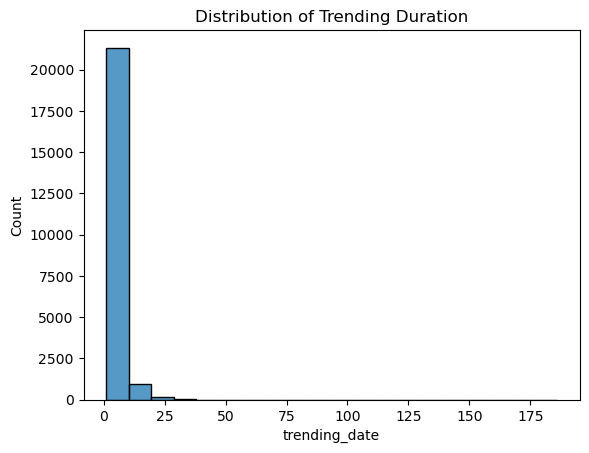

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(trending_days, bins=20)
plt.title('Distribution of Trending Duration')
plt.show()


In [39]:
!pip install matplotlib

In [43]:
import json

with open('US_category_id.json') as f:
    data = json.load(f)


category_mapping = {}
for item in data['items']:
    category_mapping[int(item['id'])] = item['snippet']['title']


In [45]:
df_all['category_name'] = df_all['category_id'].map(category_mapping)


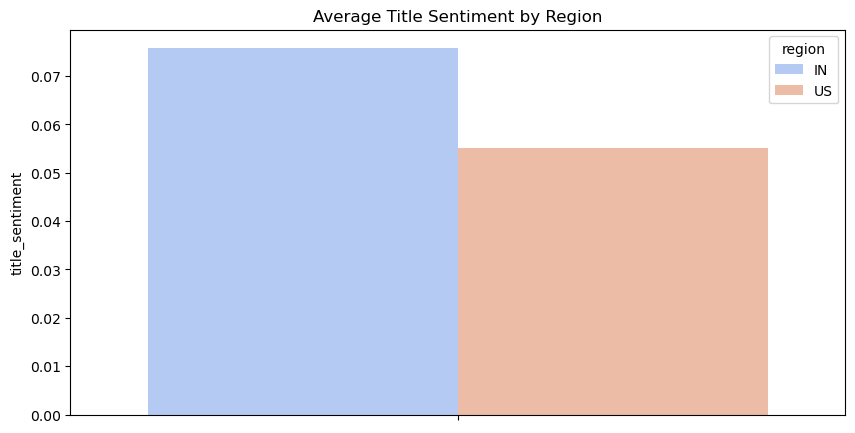

In [69]:
df_us = pd.read_csv('USvideos.csv')
df_us['region'] = 'US'

df_in = pd.read_csv('INvideos.csv')
df_in['region'] = 'IN'


df_all = pd.concat([df_us, df_in], ignore_index=True)
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df_all['title_sentiment'] = df_all['title'].apply(get_sentiment)
region_sentiment = df_all.groupby('region')['title_sentiment'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=region_sentiment, hue='region', y='title_sentiment', palette='coolwarm')
plt.title('Average Title Sentiment by Region')
plt.show()



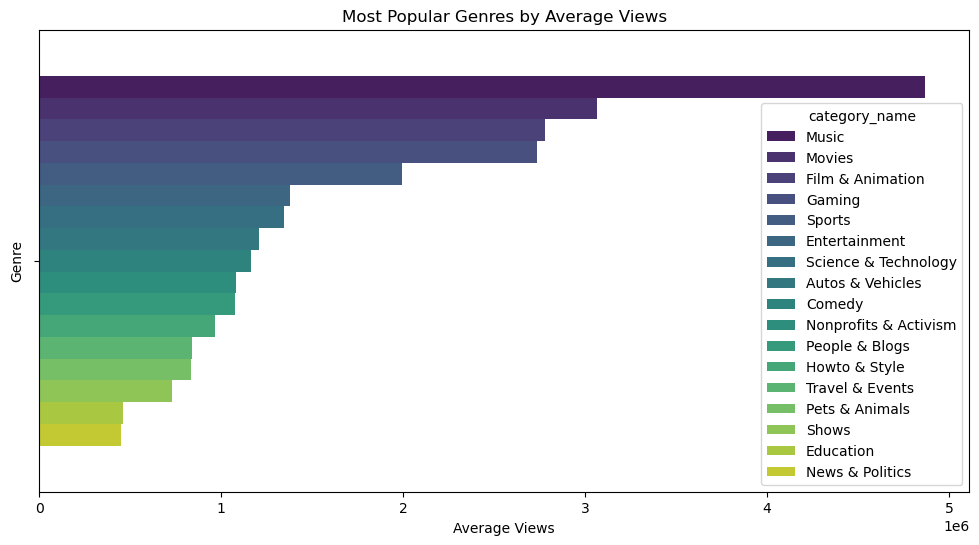

In [87]:
import json

with open('US_category_id.json') as f:
    data = json.load(f)

category_mapping = {}
for item in data['items']:
    category_mapping[int(item['id'])] = item['snippet']['title']
df_all['category_name'] = df_all['category_id'].map(category_mapping)
genre_views = df_all.groupby('category_name')['views'].mean().sort_values(ascending=False).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=genre_views, x='views', hue='category_name', palette='viridis')
plt.title('Most Popular Genres by Average Views')
plt.xlabel('Average Views')
plt.ylabel('Genre')
plt.show()


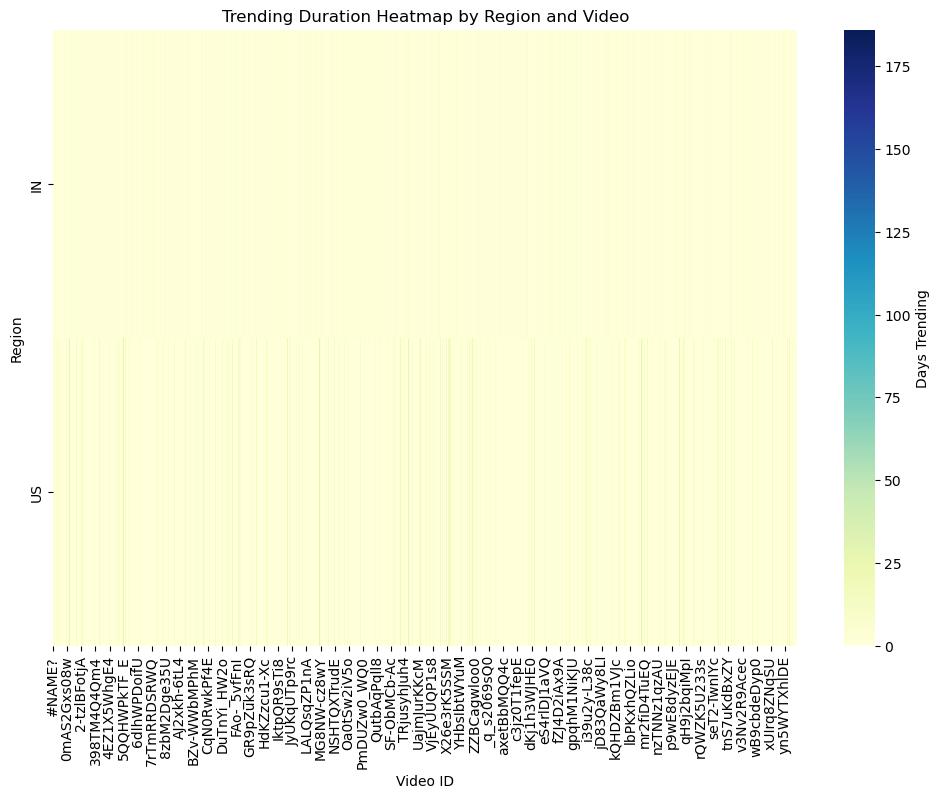

In [89]:

trending_days = df_all.groupby(['region', 'video_id'])['trending_date'].nunique().reset_index()
trending_days.rename(columns={'trending_date': 'days_trending'}, inplace=True)

pivot_table = trending_days.pivot_table(index='region', columns='video_id', values='days_trending', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar_kws={'label': 'Days Trending'})
plt.title('Trending Duration Heatmap by Region and Video')
plt.xlabel('Video ID')
plt.ylabel('Region')
plt.show()


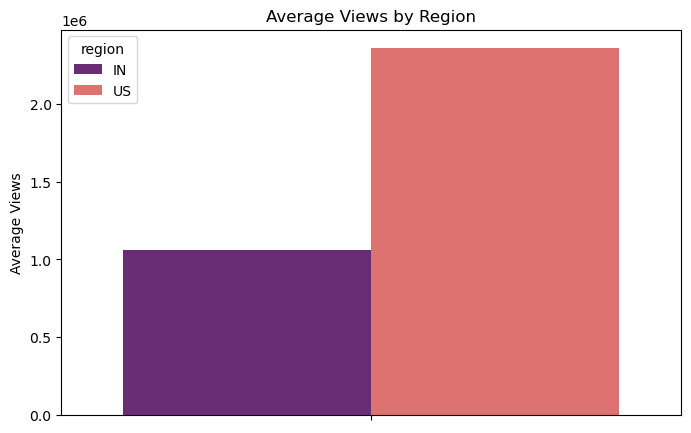

In [93]:
region_views = df_all.groupby('region')['views'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=region_views, hue='region', y='views', palette='magma')
plt.title('Average Views by Region')
plt.ylabel('Average Views')
plt.show()
